# Compare Data and Simulated spectra
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- creation date   : June 20th 2017
- re-written after new simulation SimulateSpectrum : 18th October 2017


In [2]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
print theNotebook

AnaCompareDataSimSpec


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

AnaCompareDataSimSpec
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_08jun17/HD205905


In [5]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'figure.figsize' : (10, 5)})

In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Initialisation

## Input

In [8]:
inputdir="./simandcalibspec"
MIN_IMGNUMBER=144
MAX_IMGNUMBER=357
date="20170608"
object_name='HD205905'
tag = "calibandSimSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output Fits file

In [9]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

In [10]:
outputdir="./spectrum_compdatasim"

In [11]:
ensure_dir(outputdir)

# Open Input Files

In [12]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [13]:
sorted_numbers

array([155, 159, 160, 161, 162, 165, 167, 173, 176, 183, 185, 189, 190,
       193, 196, 197, 198, 209, 213, 215, 221, 226, 231, 242, 244, 246,
       247, 251, 254, 256, 258, 262, 263, 274, 275, 276, 283, 286, 289,
       296, 297, 298, 302, 318, 319, 321, 322, 323, 327, 336, 346, 348, 357])

In [14]:
sorted_files

array(['./simandcalibspec/calibandSimSpectra_20170608_155.fits',
       './simandcalibspec/calibandSimSpectra_20170608_159.fits',
       './simandcalibspec/calibandSimSpectra_20170608_160.fits',
       './simandcalibspec/calibandSimSpectra_20170608_161.fits',
       './simandcalibspec/calibandSimSpectra_20170608_162.fits',
       './simandcalibspec/calibandSimSpectra_20170608_165.fits',
       './simandcalibspec/calibandSimSpectra_20170608_167.fits',
       './simandcalibspec/calibandSimSpectra_20170608_173.fits',
       './simandcalibspec/calibandSimSpectra_20170608_176.fits',
       './simandcalibspec/calibandSimSpectra_20170608_183.fits',
       './simandcalibspec/calibandSimSpectra_20170608_185.fits',
       './simandcalibspec/calibandSimSpectra_20170608_189.fits',
       './simandcalibspec/calibandSimSpectra_20170608_190.fits',
       './simandcalibspec/calibandSimSpectra_20170608_193.fits',
       './simandcalibspec/calibandSimSpectra_20170608_196.fits',
       './simandcalibspec

In [15]:

all_headers, \
all_dates, \
all_objects, \
all_airmass, \
all_titles, \
all_exposures, \
all_ut, all_ra,all_dec,all_epoch,all_zenith,all_ha,all_st,all_alt,all_focus,\
all_temp, all_press,all_hum,all_windsp,\
all_seeing,all_seeingam,\
all_filt,all_filt1,all_filt2,\
all_leftspectra_data, \
all_rightspectra_data, \
all_leftspectra_data_stat_err ,\
all_rightspectra_data_stat_err ,\
all_leftspectra_wl,\
all_rightspectra_wl, \
all_totleftspectra_data, \
all_totrightspectra_data, \
all_sim_spectra_wl, \
all_sim_spectra_data=BuildCalibandSimSpecFull(sorted_files,sorted_numbers)

## Clean Spectra

- storage add trailing empty bins ..

In [16]:
all_sim_spectra_wl_cut,all_sim_spectra_data_cut=RemoveBadWavelengths(all_sim_spectra_wl,all_sim_spectra_data)

In [17]:
all_leftspectra_wl_cut,all_leftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data)
all_rightspectra_wl_cut,all_rightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data)

all_leftspectra_wl_cut,all_totleftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_totleftspectra_data)
all_rightspectra_wl_cut,all_totrightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_totrightspectra_data)

all_leftspectra_wl_cut,all_leftspectra_data_stat_err_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data_stat_err)
all_rightspectra_wl_cut,all_rightspectra_data_stat_err_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data_stat_err)

In [18]:
all_sim_spectra_wl,all_sim_spectra_data=all_sim_spectra_wl_cut,all_sim_spectra_data_cut

In [19]:
all_rightspectra_wl,all_rightspectra_data=all_rightspectra_wl_cut,all_rightspectra_data_cut

In [20]:
all_totleftspectra_data=all_totleftspectra_data_cut
all_totrightspectra_data=all_totrightspectra_data_cut
all_rightspectra_data_stat_err=all_rightspectra_data_stat_err_cut
all_leftspectra_data_stat_err=all_leftspectra_data_stat_err_cut

## Check

In [21]:
NDATA=len(all_headers)

for idx in range(NDATA):
    print idx,all_headers[idx]["FILTERS"]

0 RG715 Ron200
1 RG715 HoloPhP
2 FGB37 HoloPhAg
3 RG715 HoloPhAg
4 FGB37 HoloAmAg
5 RG715 Ron200
6 RG715 Thor300
7 RG715 HoloAmAg
8 FGB37 Thor300
9 RG715 HoloAmAg
10 RG715 Ron200
11 RG715 HoloPhP
12 FGB37 HoloPhAg
13 RG715 HoloAmAg
14 FGB37 Thor300
15 RG715 Thor300
16 FGB37 HoloPhP
17 RG715 HoloPhP
18 RG715 HoloAmAg
19 RG715 Ron200
20 RG715 HoloPhAg
21 FGB37 Thor300
22 RG715 HoloPhAg
23 FGB37 HoloAmAg
24 FGB37 Ron200
25 FGB37 Thor300
26 RG715 Thor300
27 RG715 HoloPhAg
28 FGB37 Ron200
29 FGB37 Thor300
30 FGB37 HoloPhP
31 FGB37 HoloAmAg
32 RG715 HoloAmAg
33 FGB37 Ron200
34 RG715 Ron200
35 FGB37 Thor300
36 RG715 HoloAmAg
37 FGB37 Thor300
38 RG715 HoloPhP
39 FGB37 Thor300
40 RG715 Thor300
41 FGB37 HoloPhP
42 FGB37 HoloAmAg
43 FGB37 HoloPhP
44 RG715 HoloPhP
45 RG715 HoloPhAg
46 FGB37 HoloAmAg
47 RG715 HoloAmAg
48 RG715 Thor300
49 FGB37 Thor300
50 FGB37 Thor300
51 FGB37 HoloPhP
52 RG715 Thor300


# Analysis

## Dispersers

In [22]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [23]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  []
dia Thor300  	 : filt1_idx ::  [ 6  8 14 15 21 25 26 29 35 37 39 40 48 49 50 52]
dia HoloPhP  	 : filt2_idx ::  [ 1 11 16 17 30 38 41 43 44 51]
dia HoloPhAg  	 : filt3_idx ::  [ 2  3 12 20 22 27 45]
dia HoloAmAg  	 : filt4_idx ::  [ 4  7  9 13 18 23 31 32 36 42 46 47]
dia Ron200  	 : filt5_idx ::  [ 0  5 10 19 24 28 33 34]
Unknown  	 : filt6_idx ::  []


In [24]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

## Airmass

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


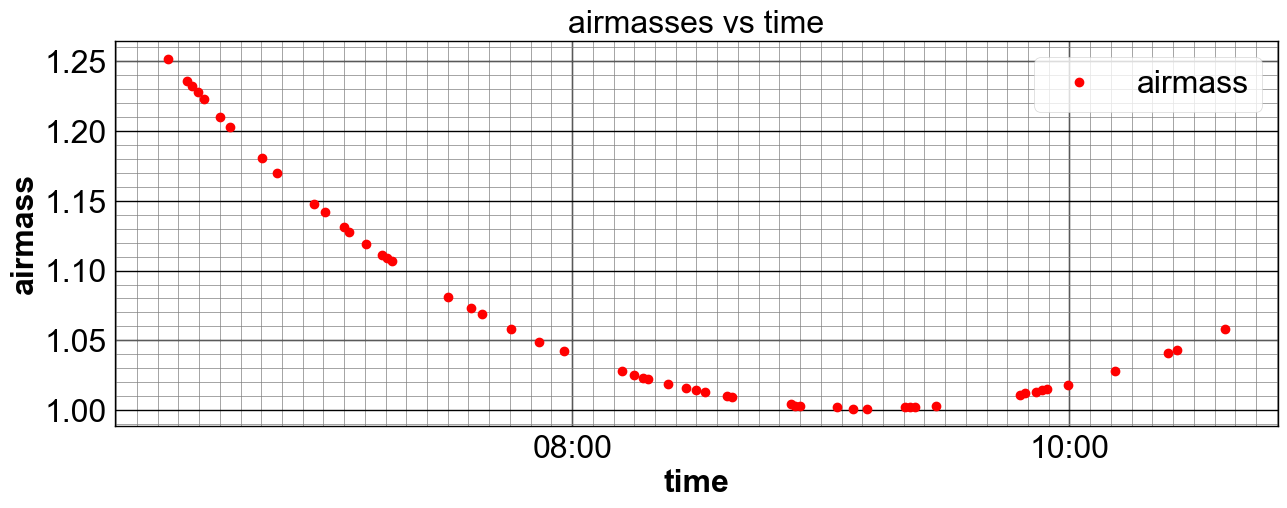

In [25]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

## Show Spectra
==========================

In [26]:
NDATA=len(all_rightspectra_data)

### Work only on right spectra

../../common_tools/common_notebook.py:5283: RuntimeWarning: divide by zero encountered in float_scalars
  calibfactor=maxdata_in_range/maxsim_in_range   # calib factor data/sim in wl range
../../common_tools/common_notebook.py:5290: RuntimeWarning: invalid value encountered in multiply
  spectrum_sim=spectrum_sim*calibfactor  # renormalize the sim to data units
/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


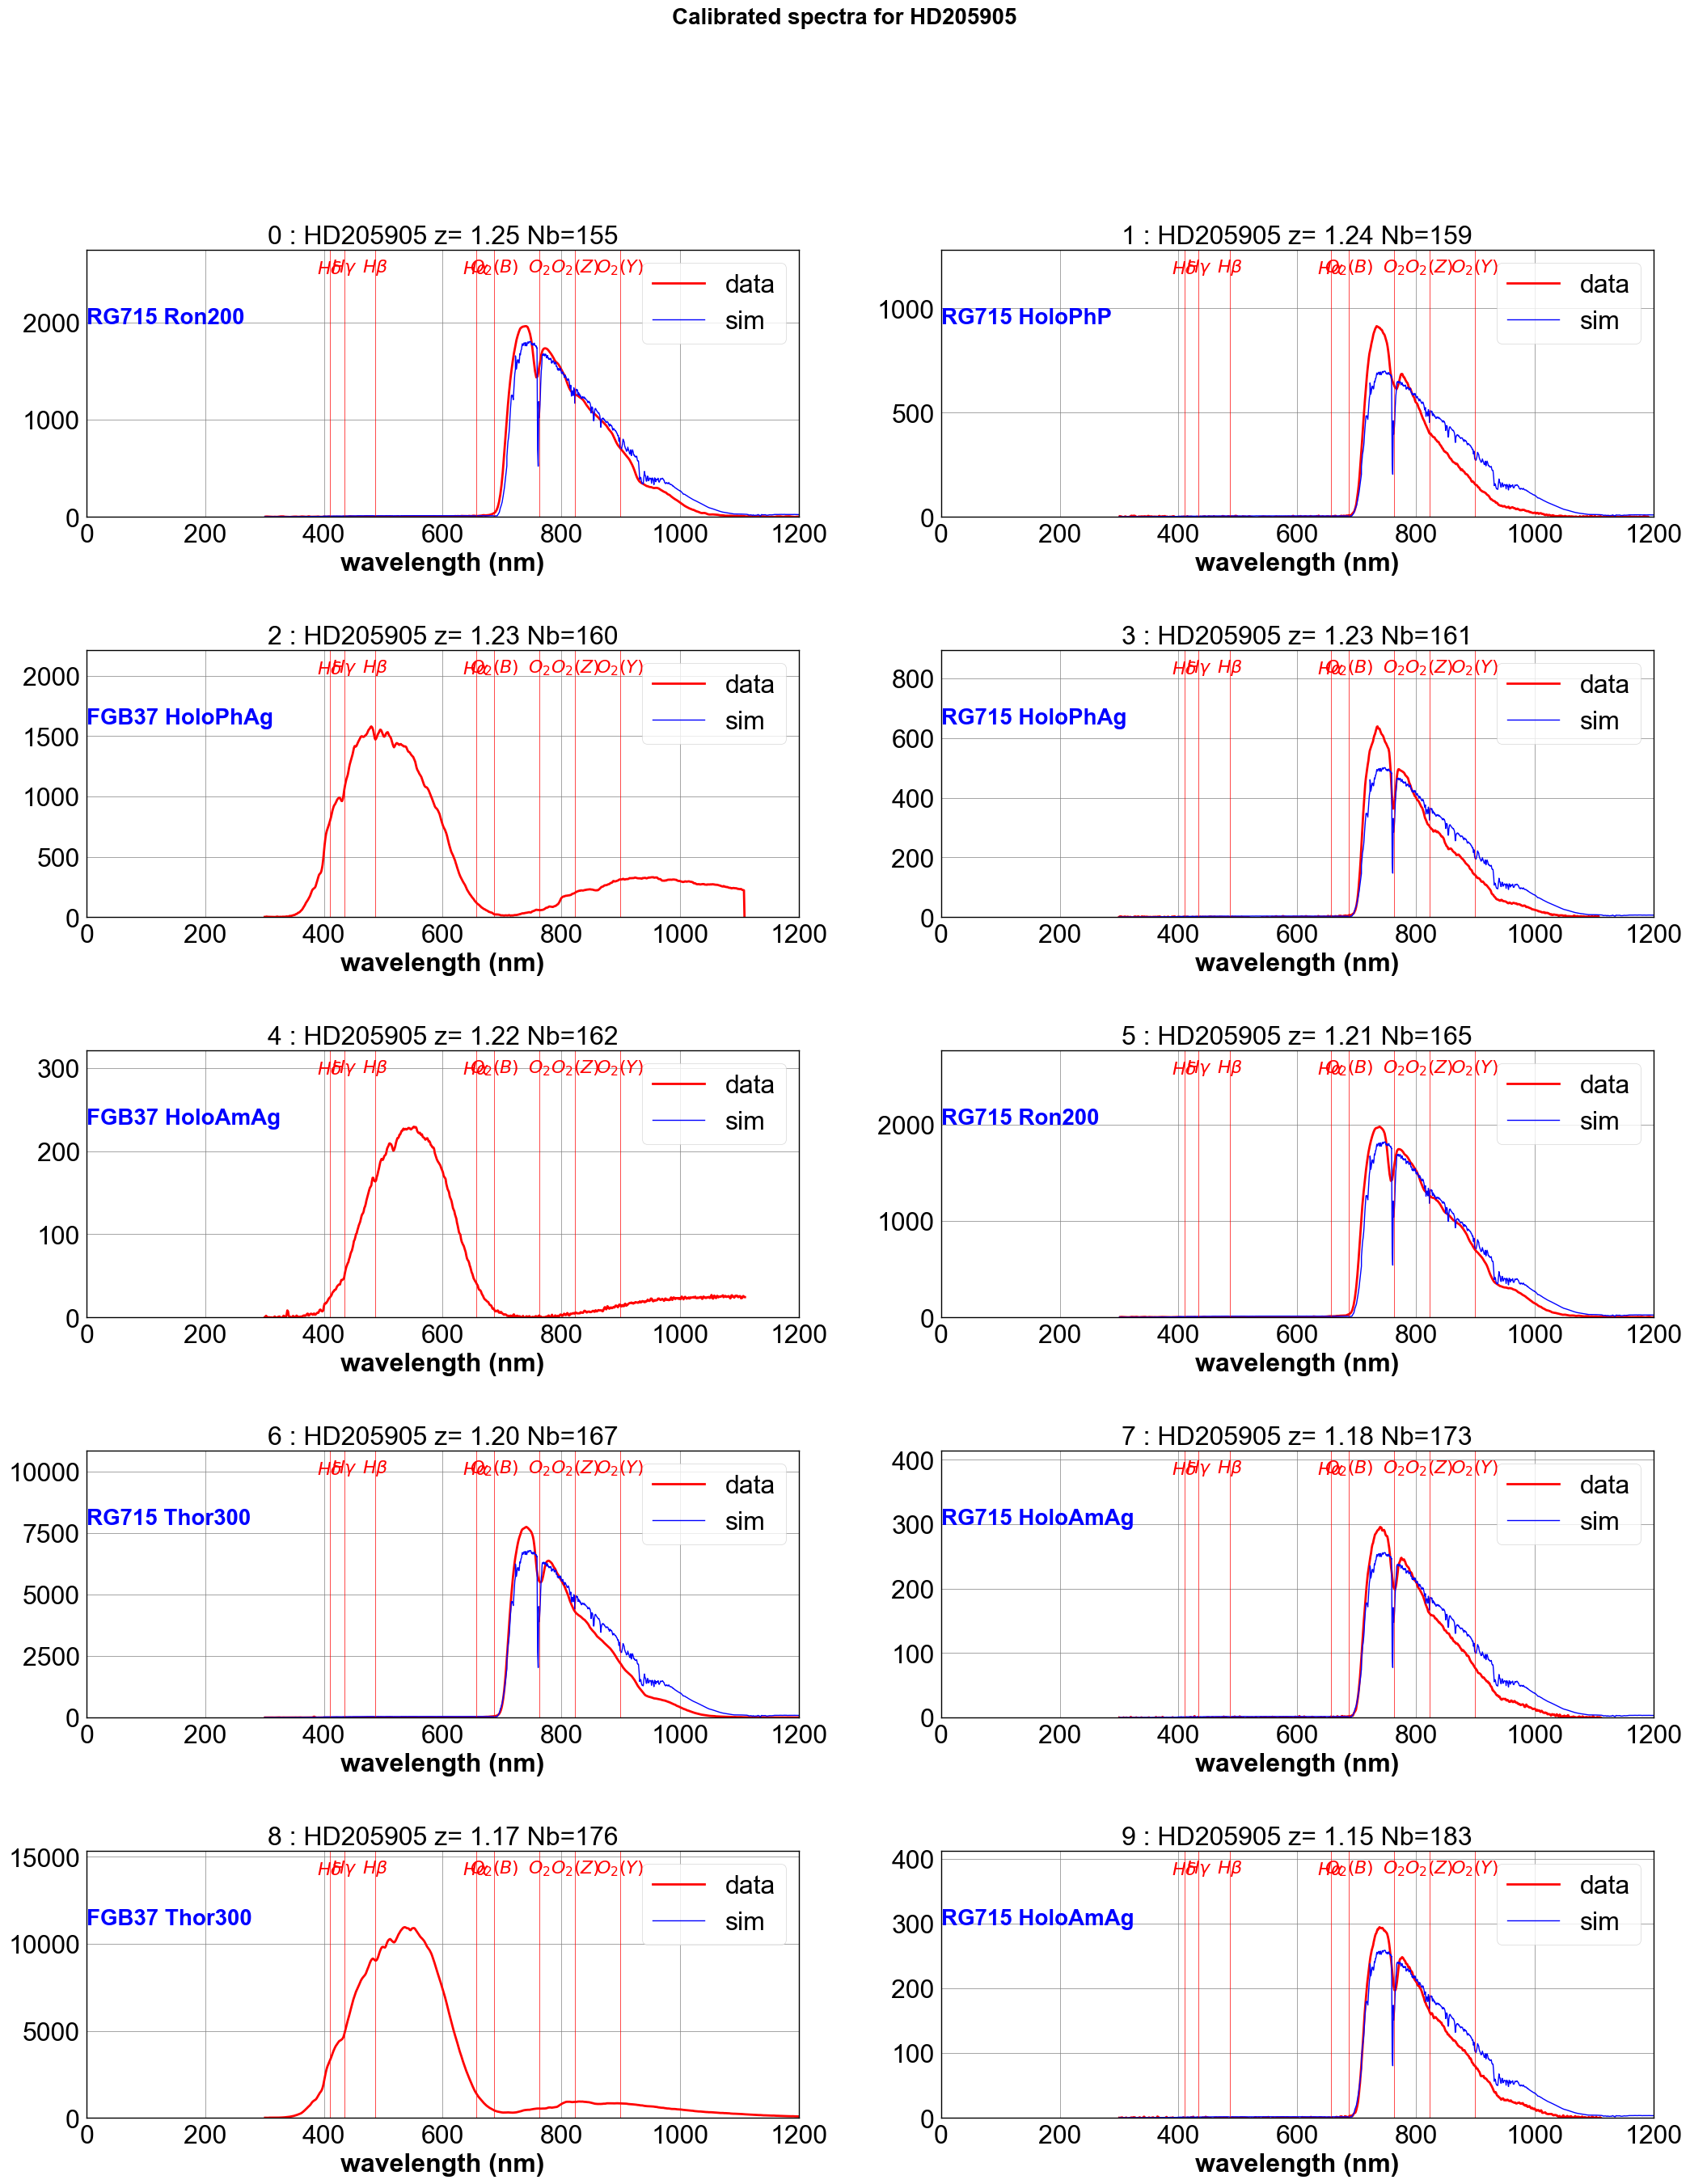

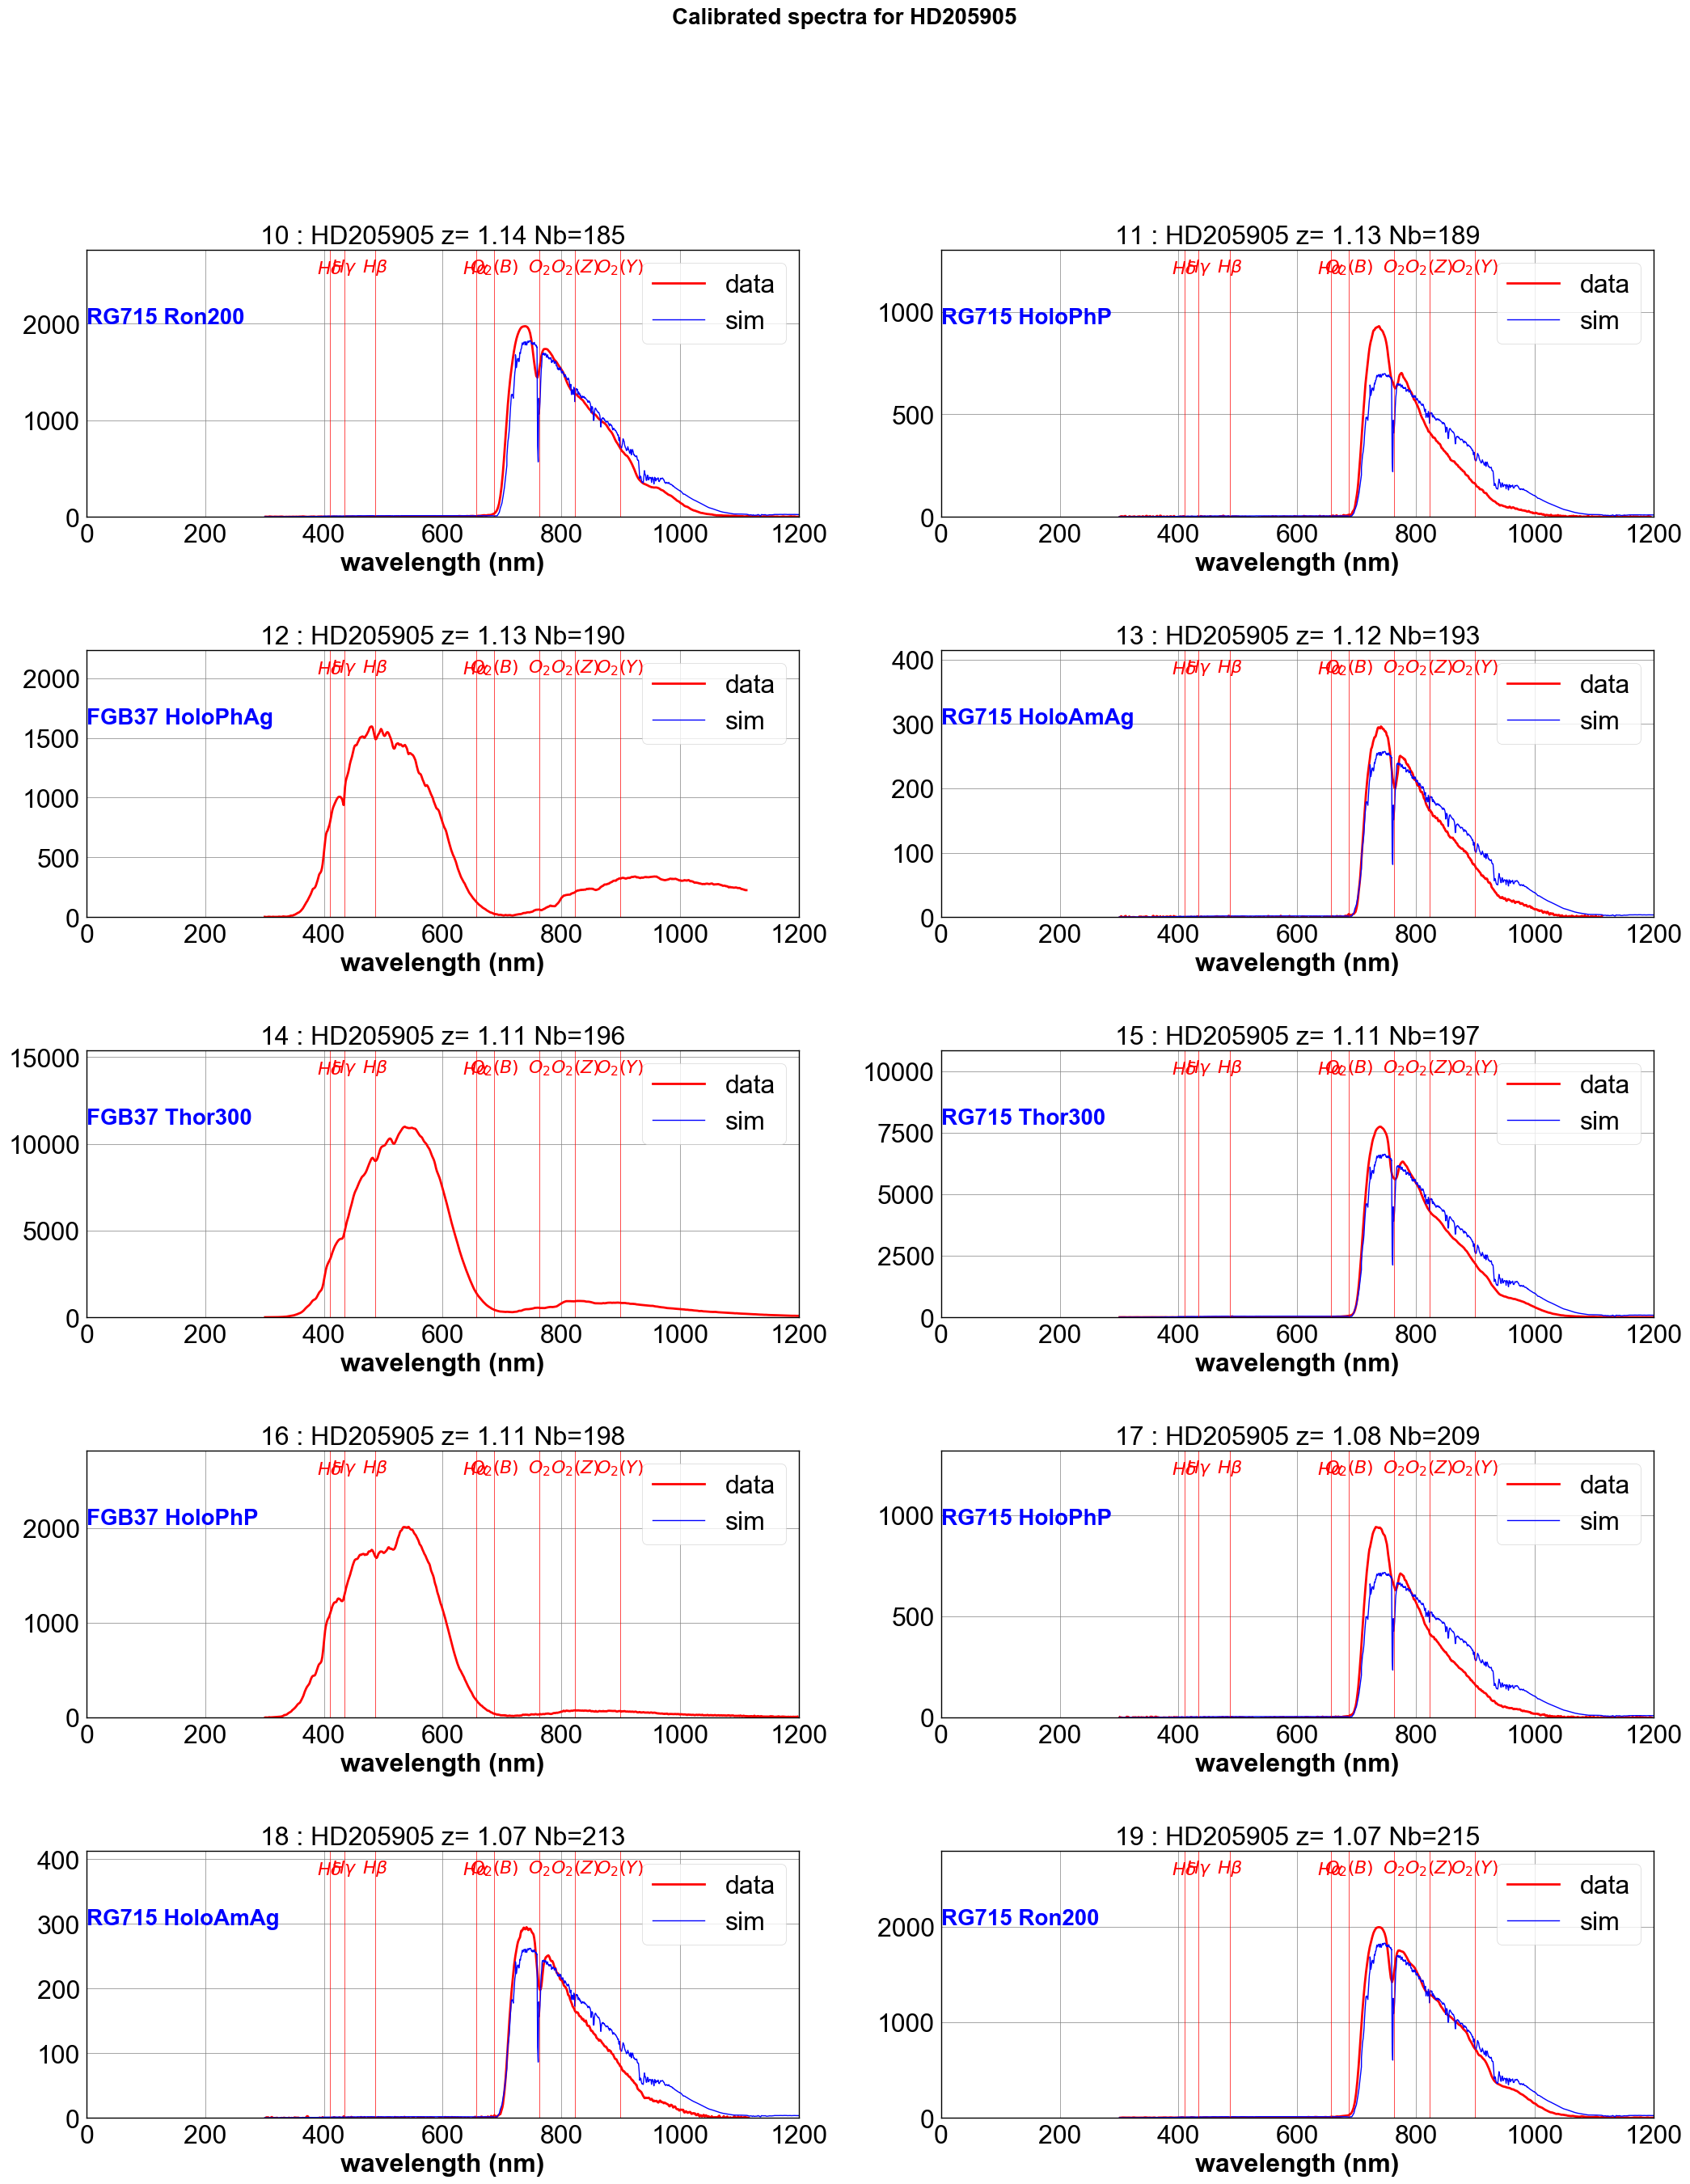

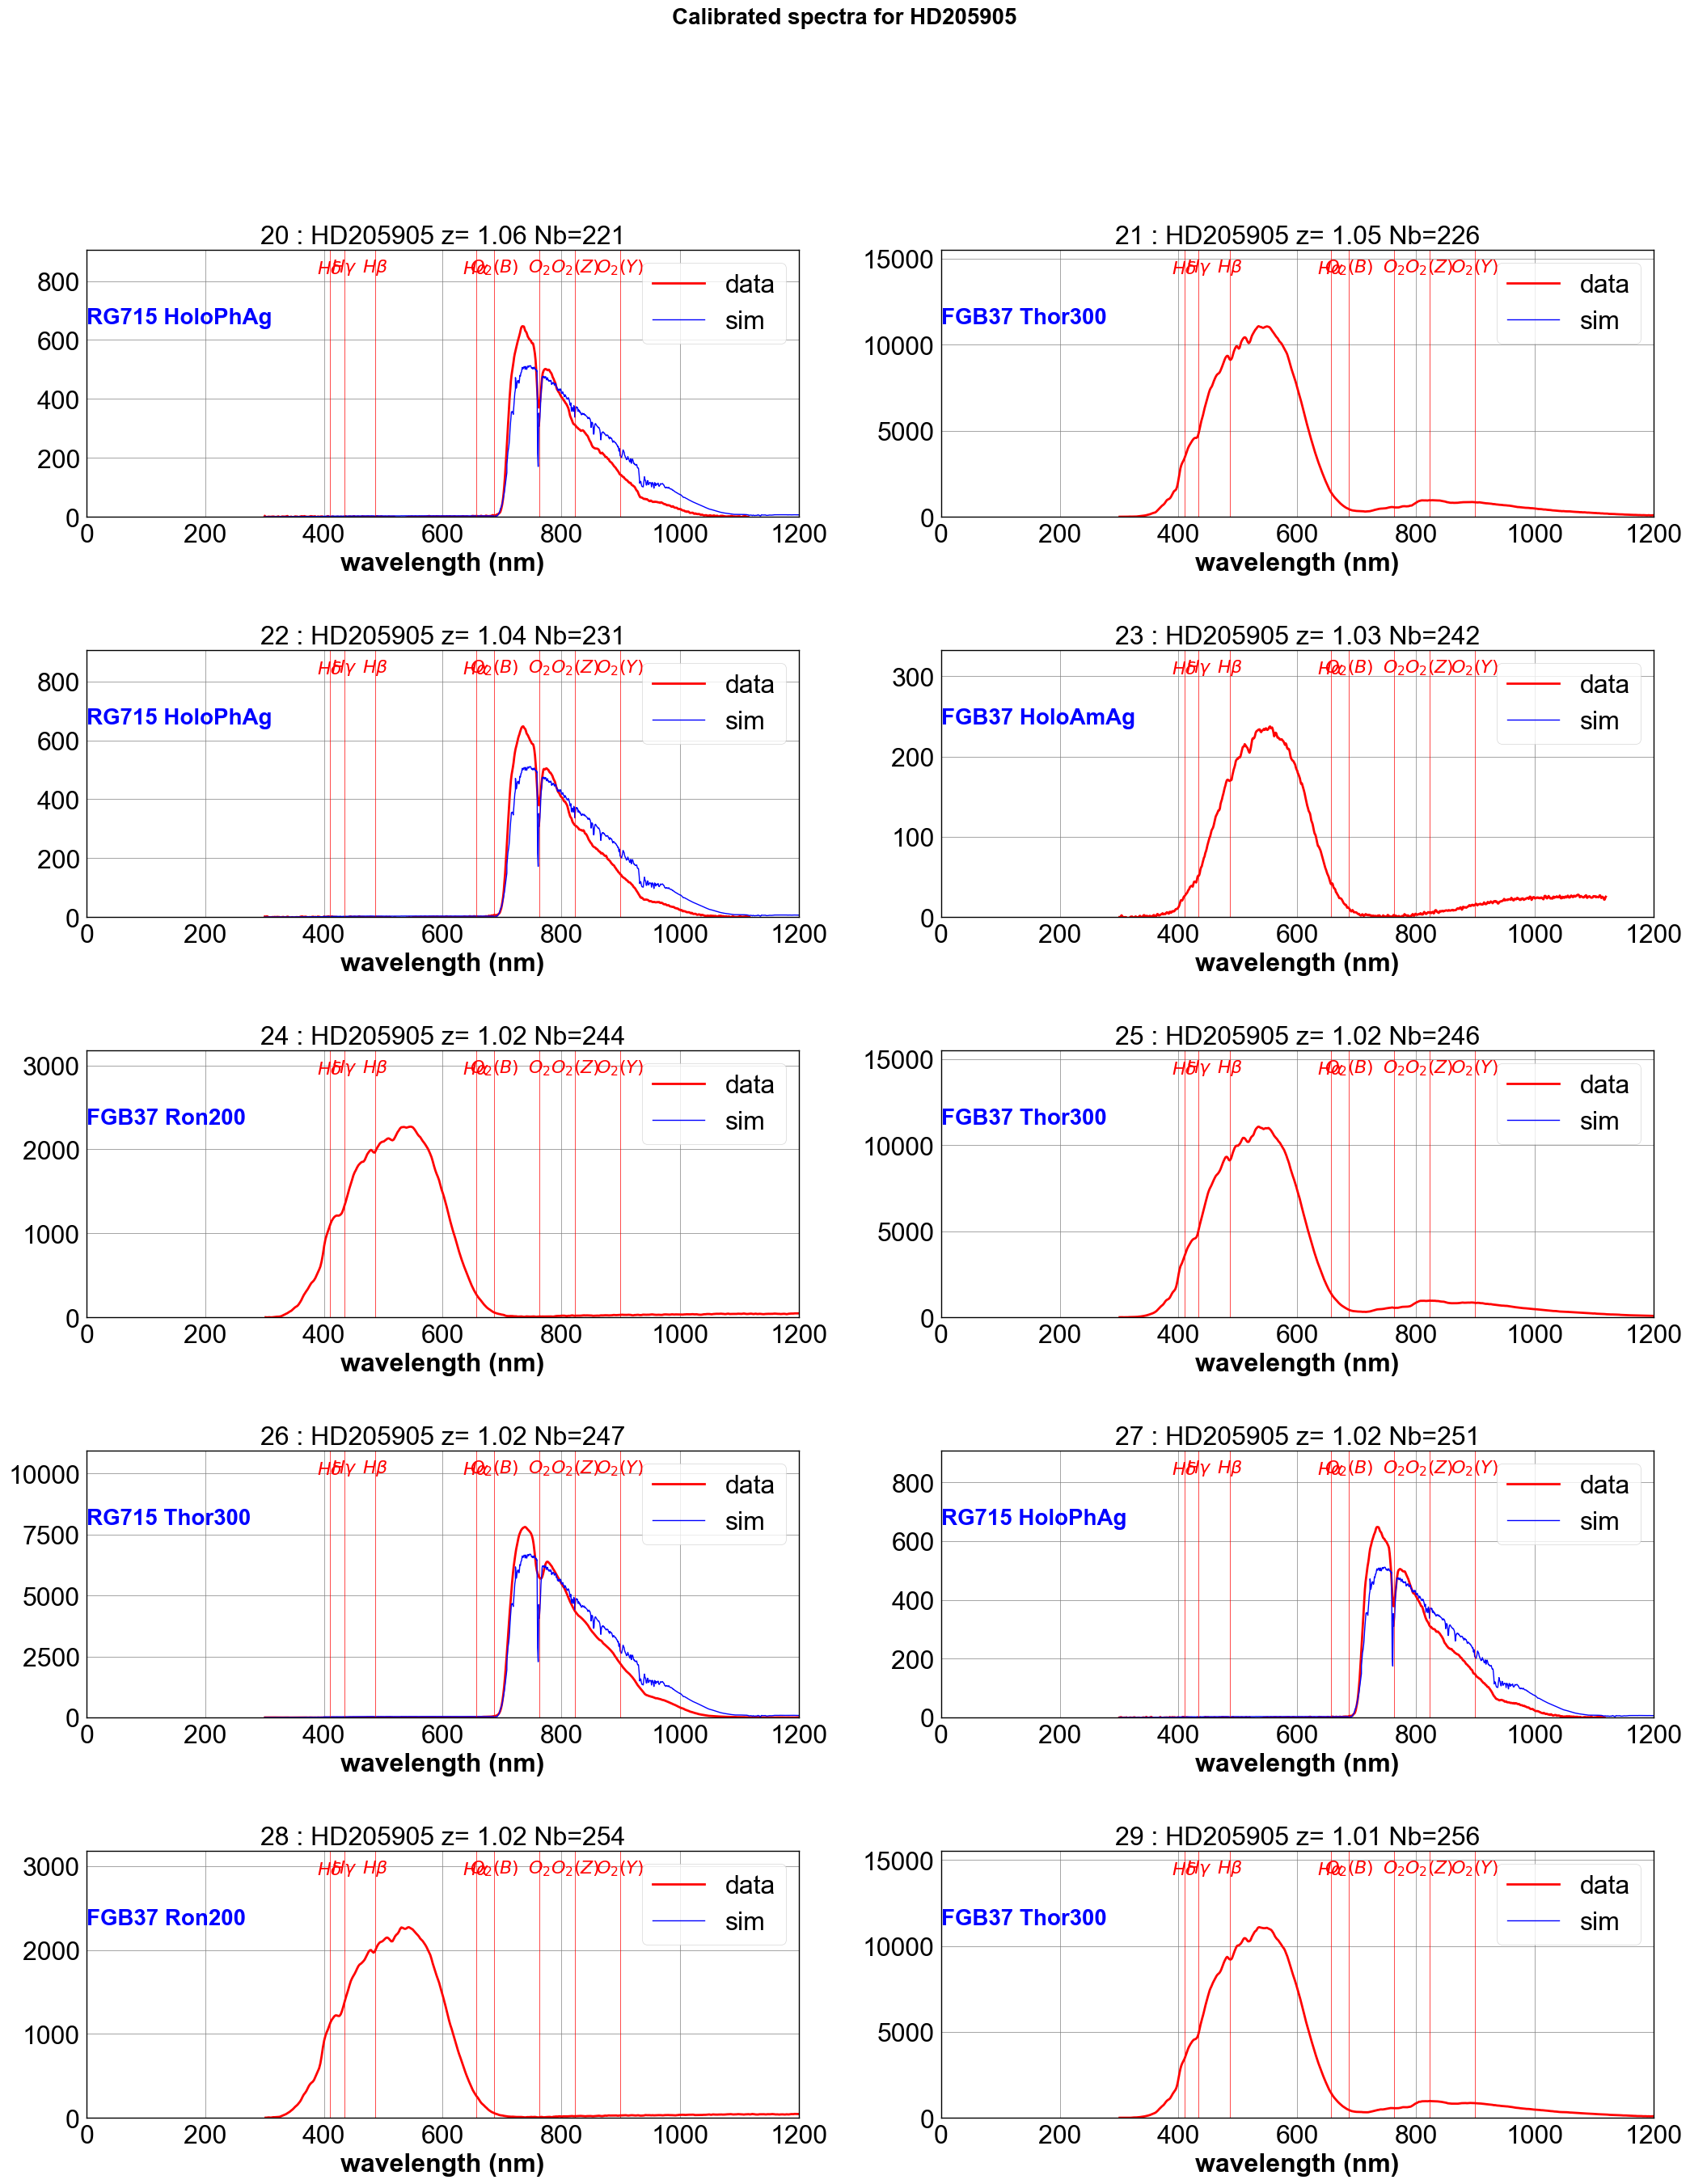

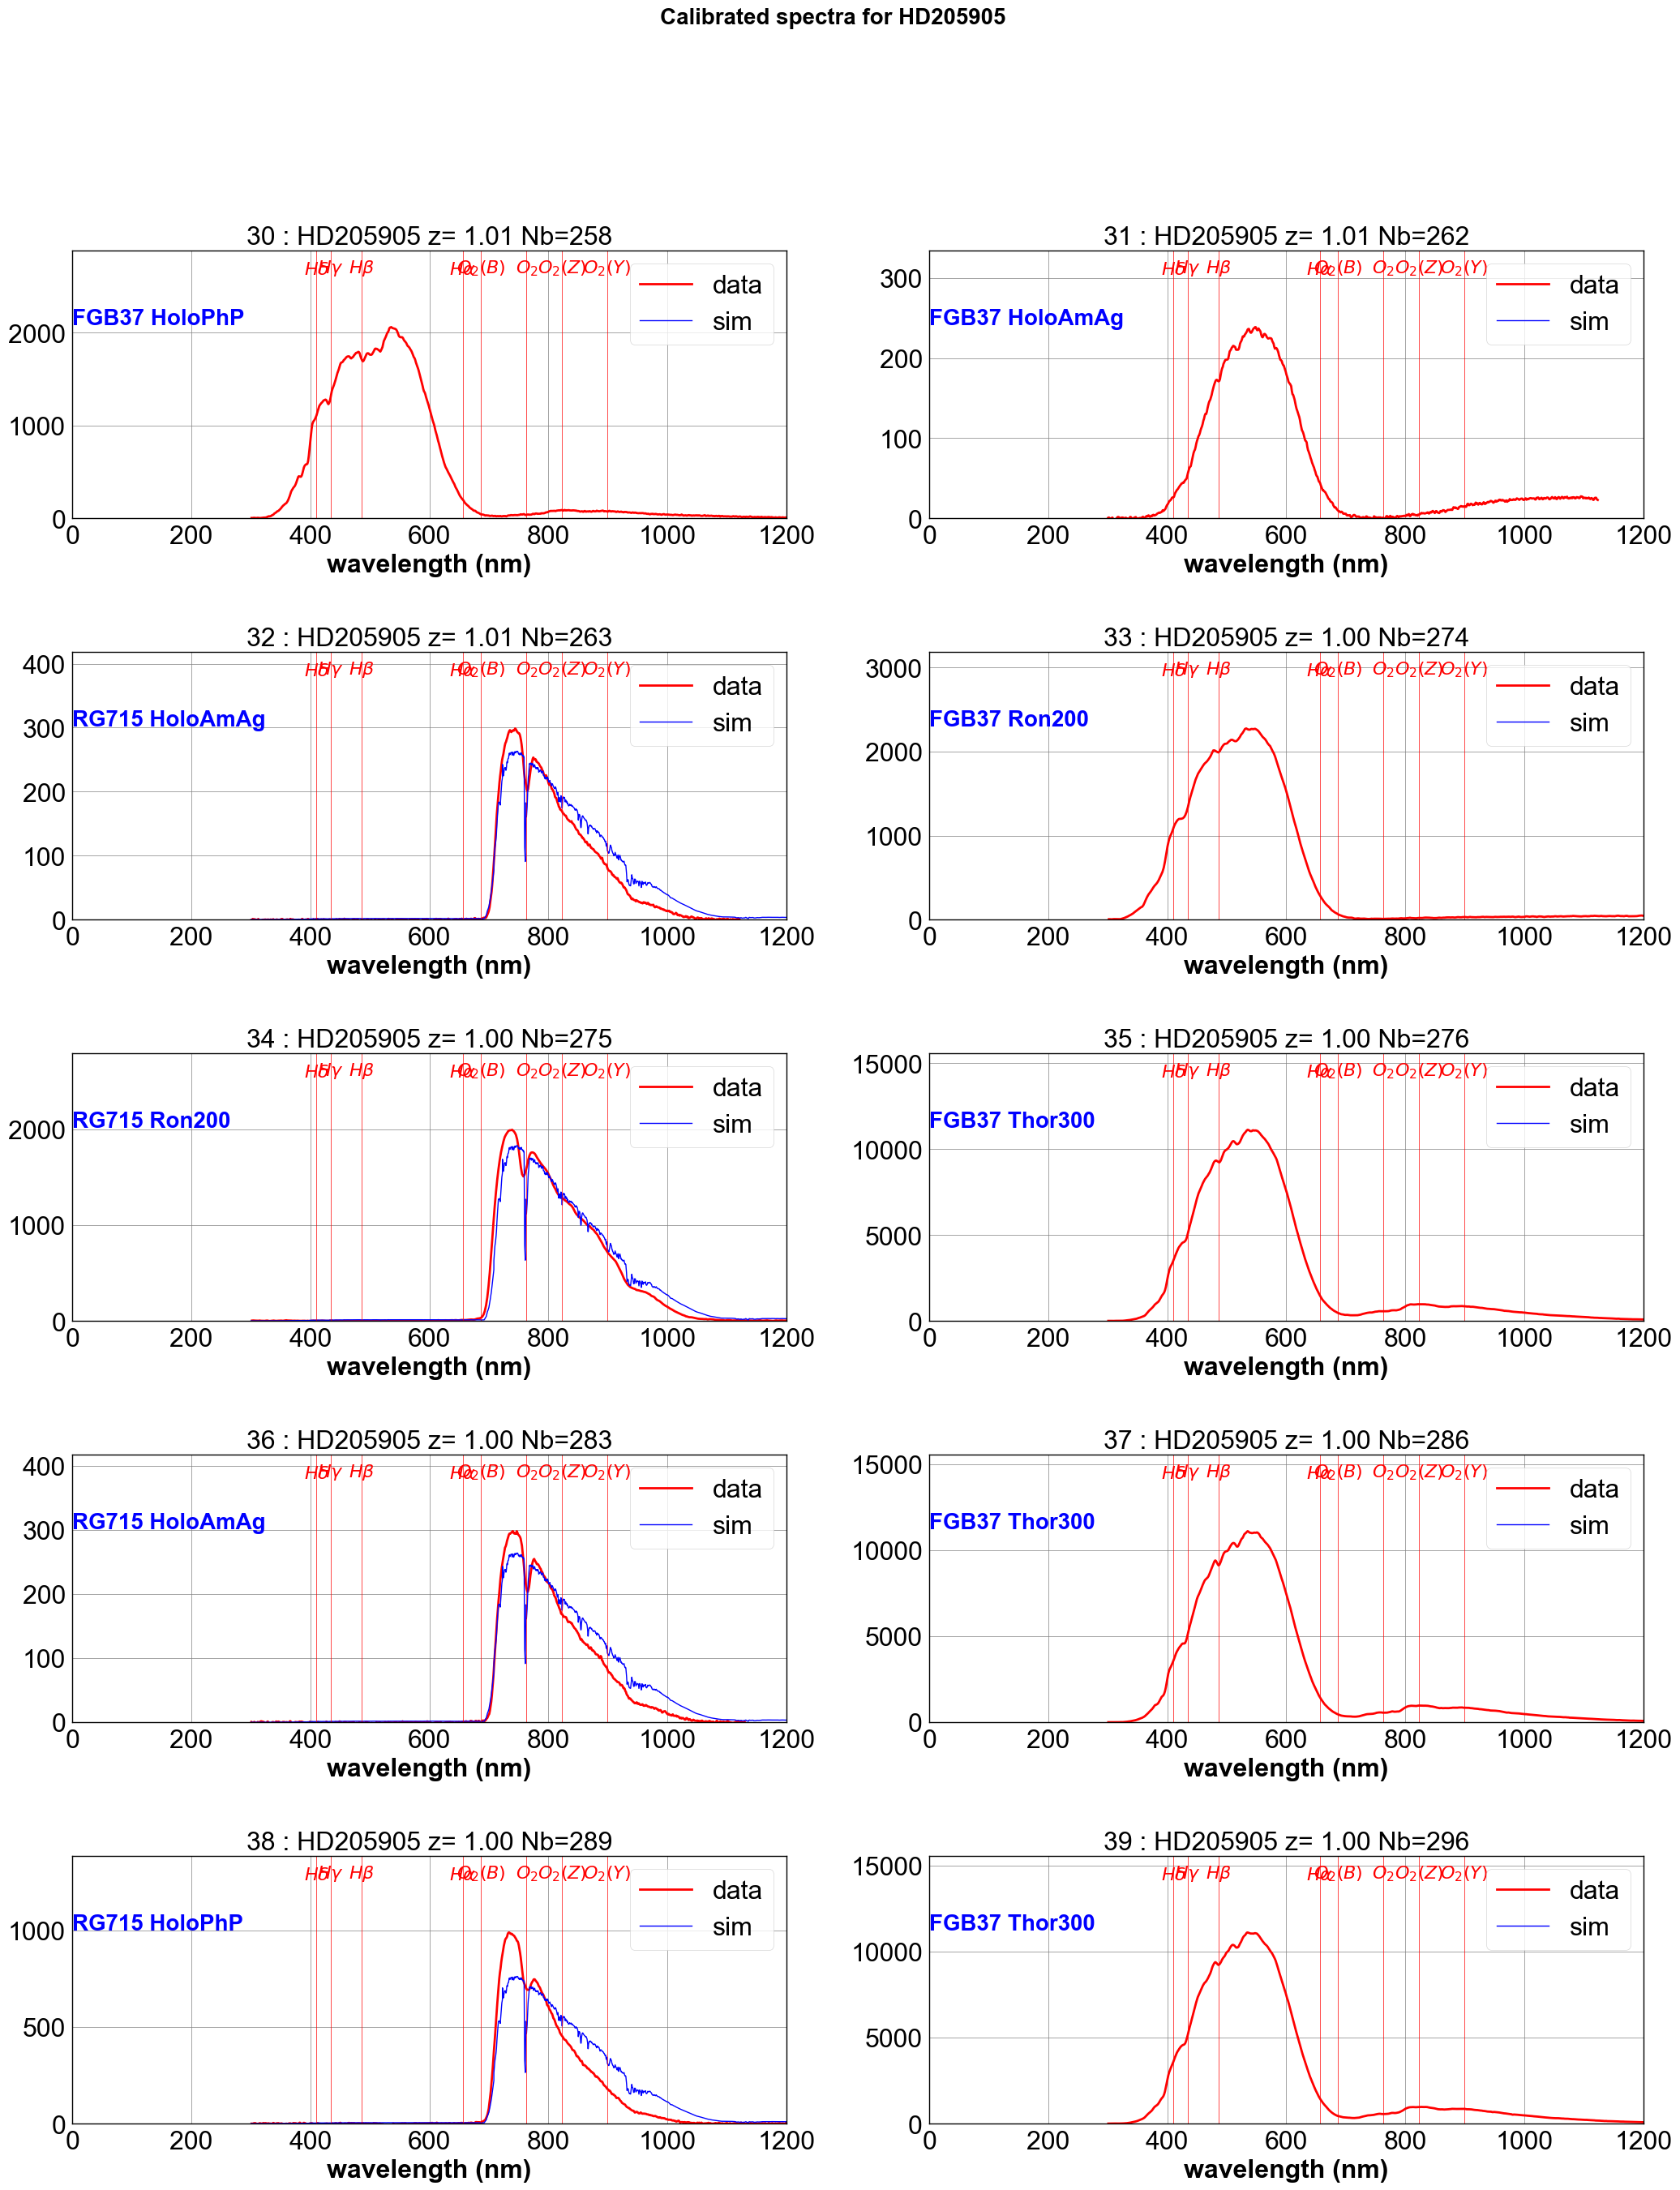

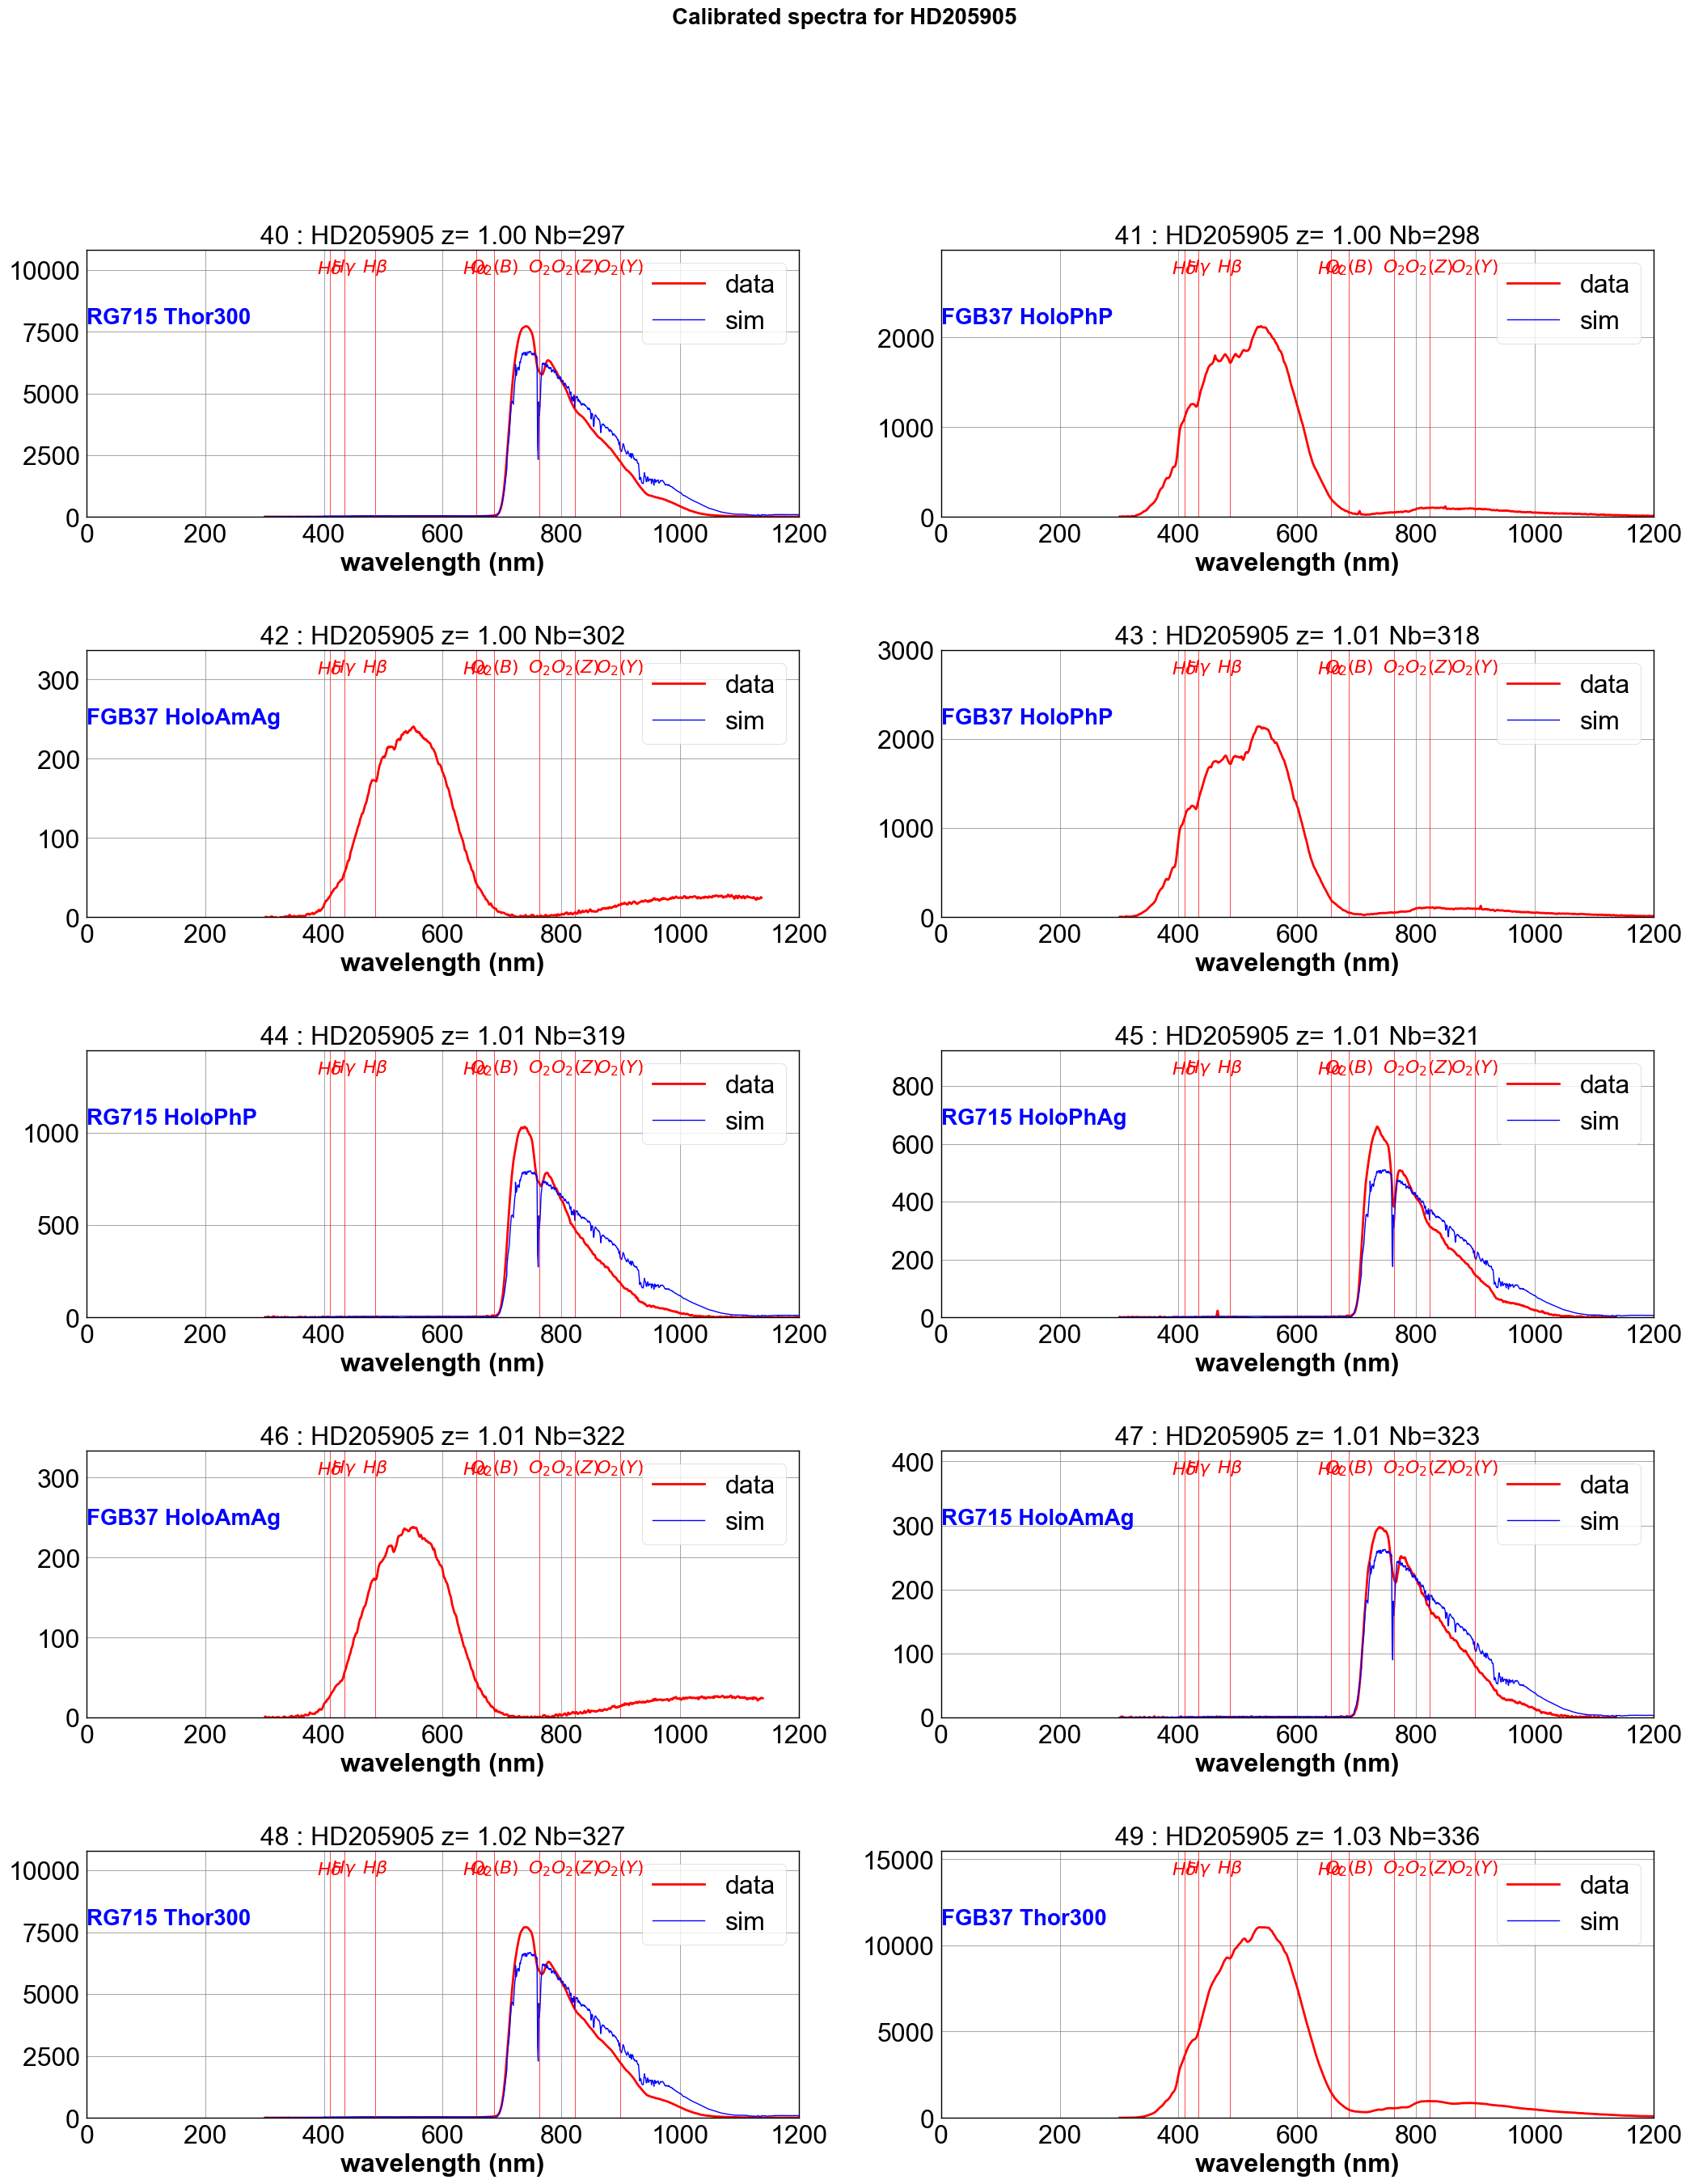

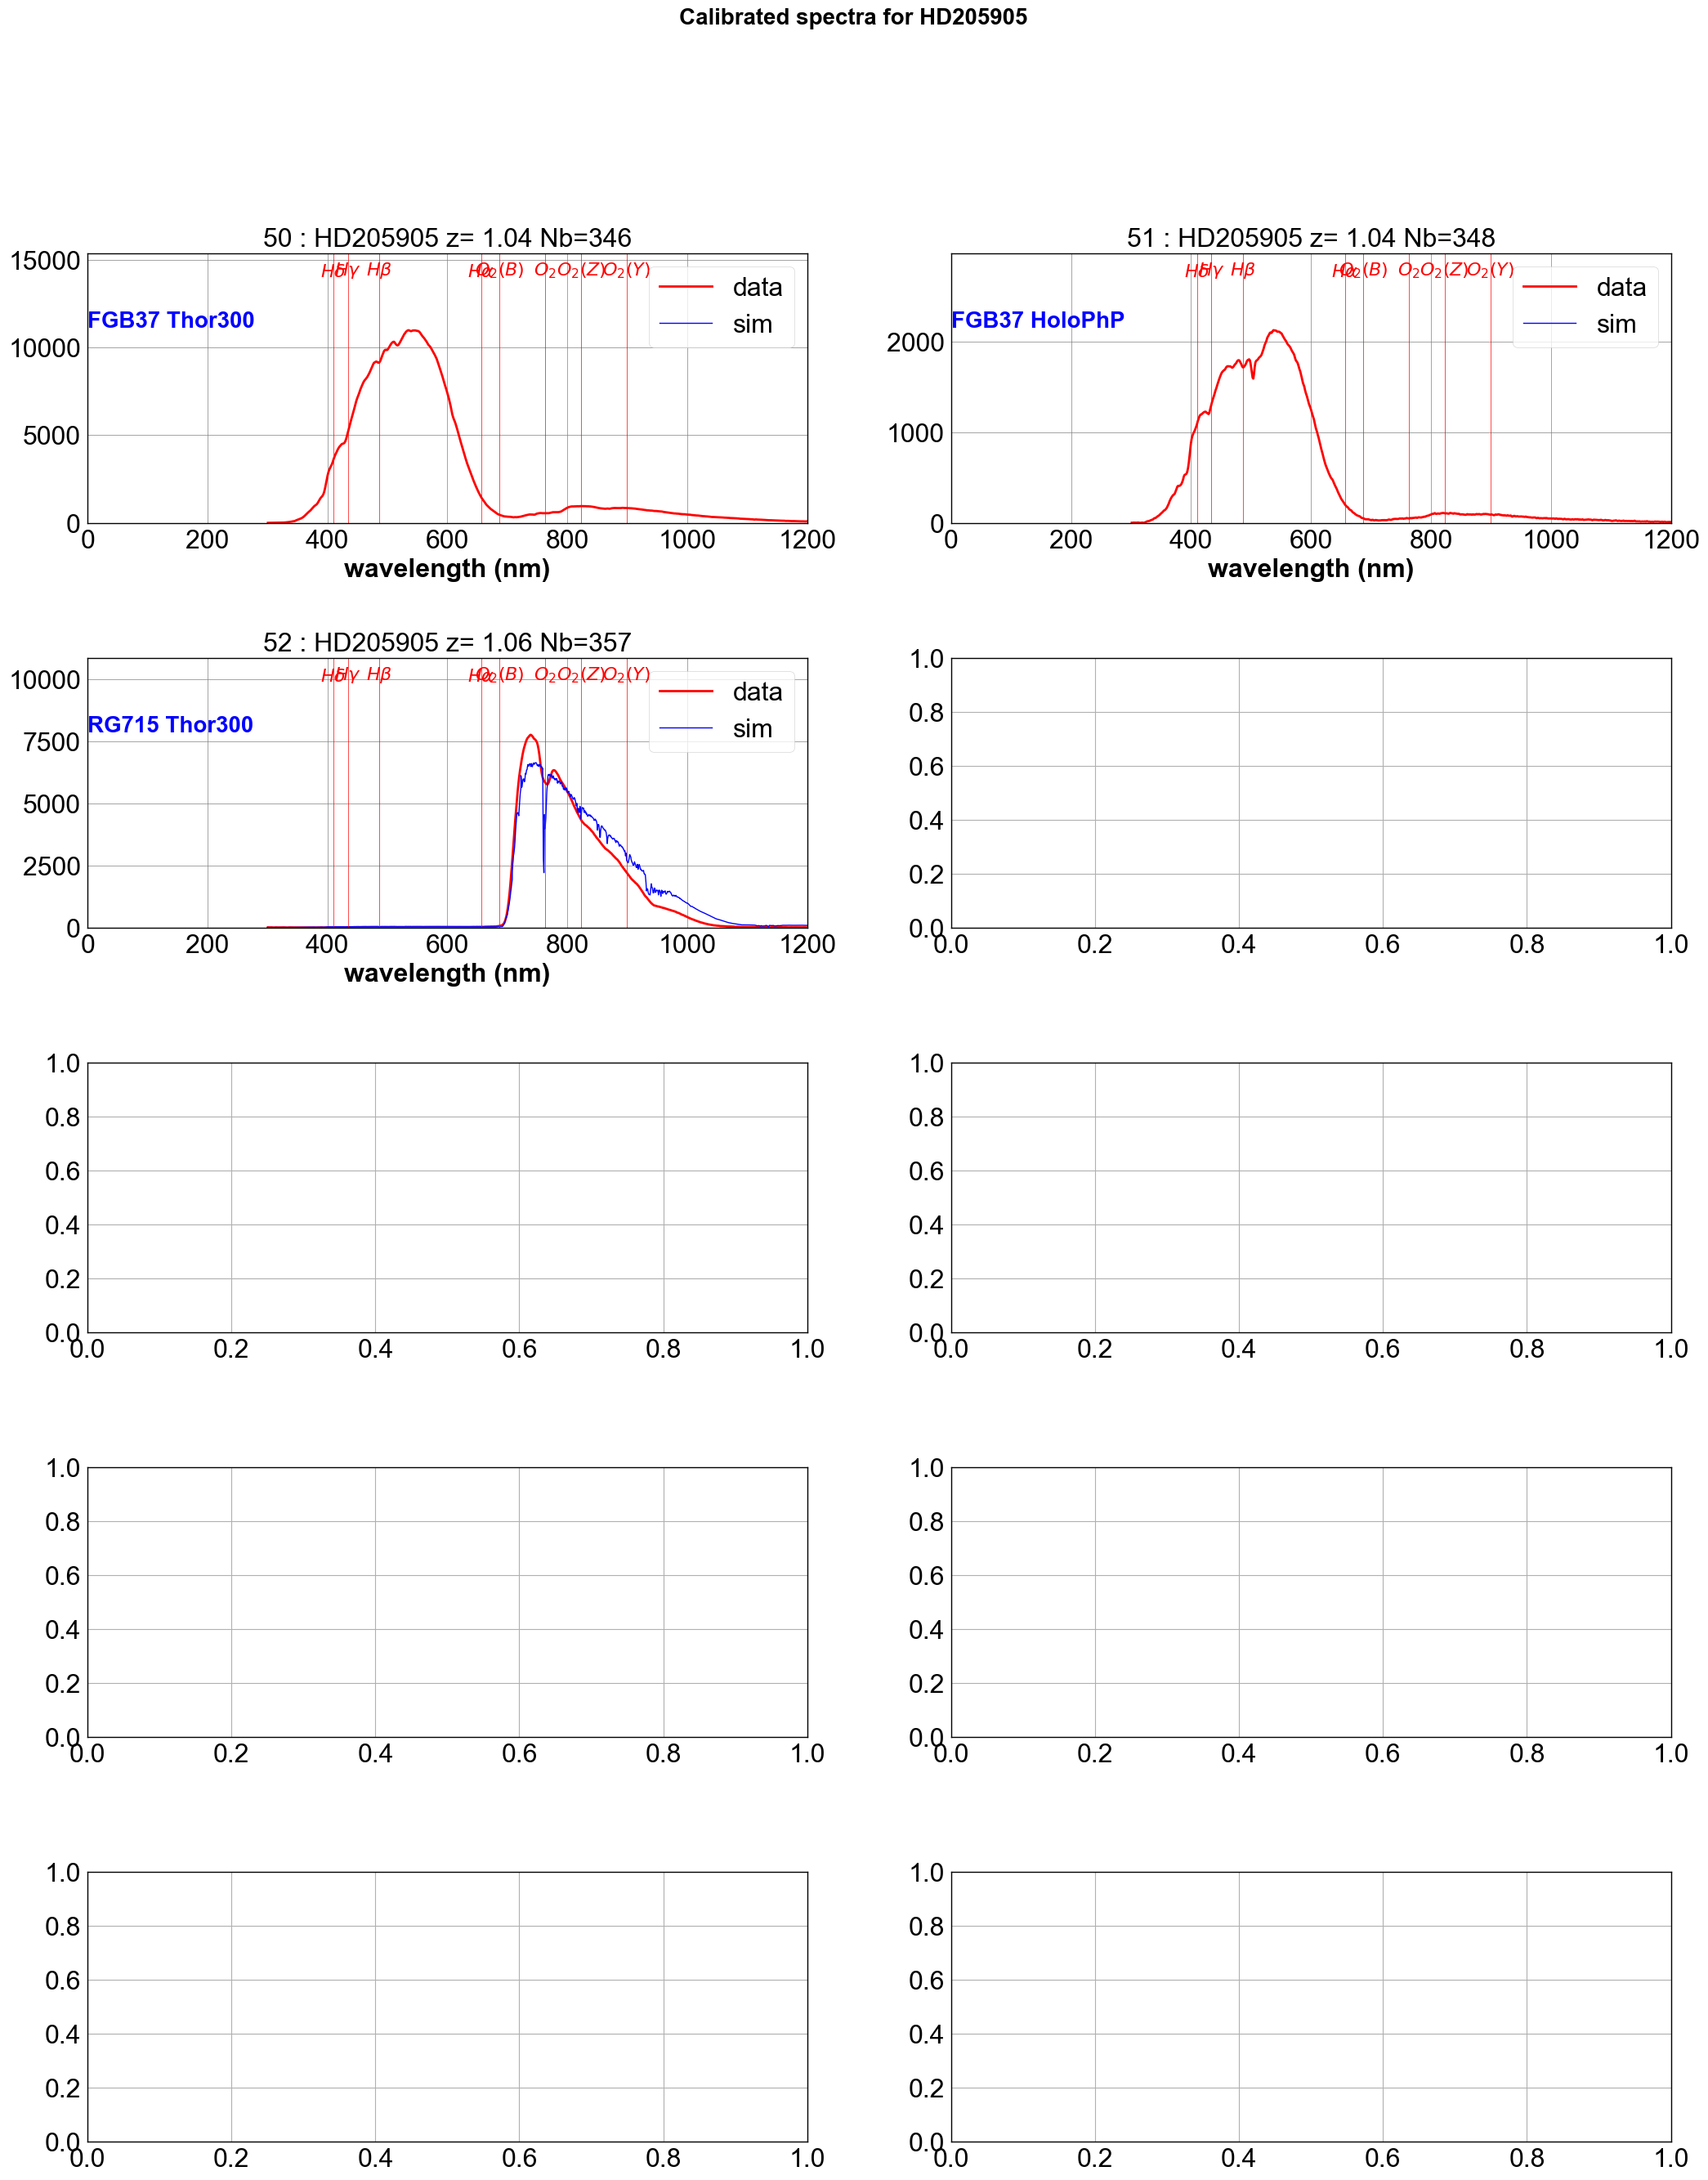

In [27]:
all_calibdatasimfactors=ShowCalibAndSimSpectrainPDF(all_rightspectra_data,all_rightspectra_wl,all_titles,object_name,all_filt,dir_top_images,all_sim_spectra_data,all_sim_spectra_wl)

## About Relative Calibration Factor

In [28]:
all_calibdatasimfactors=np.array(all_calibdatasimfactors)

In [30]:
Thor300_factor=all_calibdatasimfactors[Thor300_index]
#Ron400_factor=all_calibdatasimfactors[Ron400_index]
HoloPhP_factor=all_calibdatasimfactors[HoloPhP_index]
HoloPhAg_factor=all_calibdatasimfactors[HoloPhAg_index]
HoloAmAg_factor=all_calibdatasimfactors[HoloAmAg_index]
Ron200_factor=all_calibdatasimfactors[Ron200_index]

In [31]:
Thor300_factor_av=np.median(Thor300_factor)
#Ron400_factor_av=np.median(Ron400_factor)
HoloPhP_factor_av=np.median(HoloPhP_factor)
HoloPhAg_factor_av=np.median(HoloPhAg_factor)
HoloAmAg_factor_av=np.median(HoloAmAg_factor)
Ron200_factor_av=np.median(Ron200_factor)

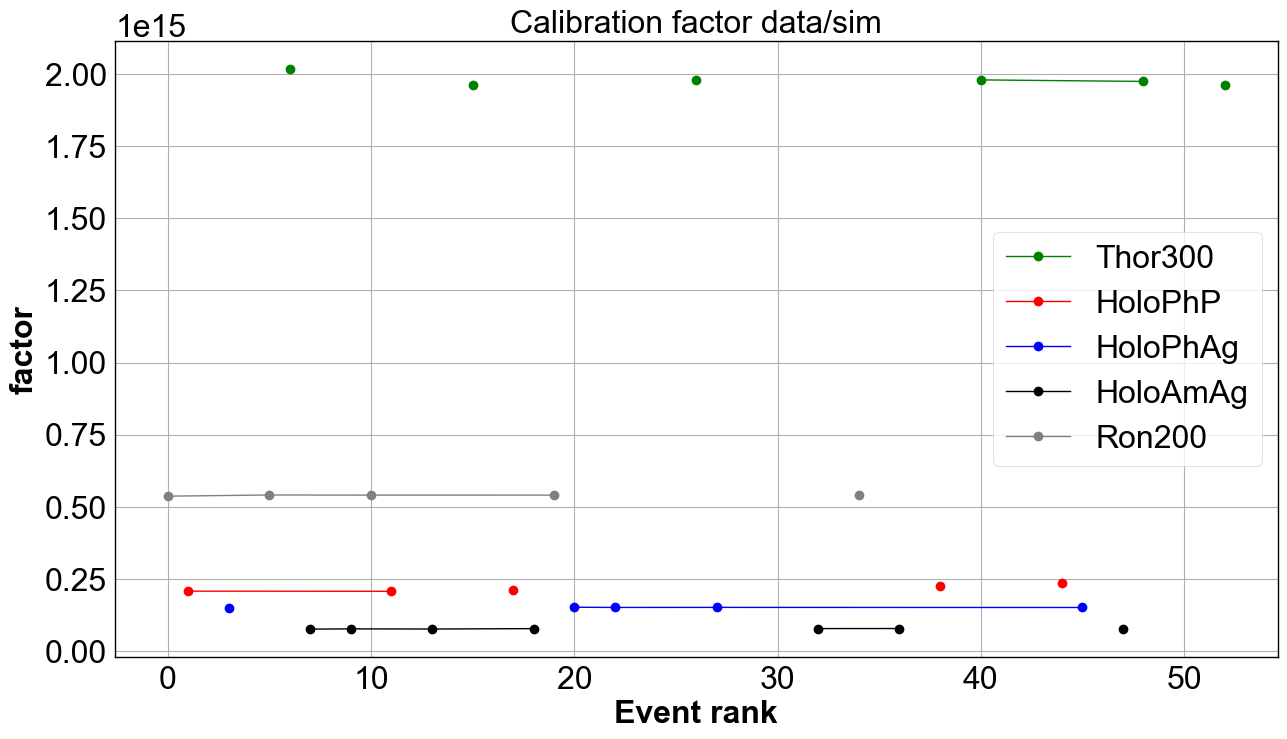

In [32]:
figfilename=os.path.join(dir_top_images,'calib_factor.pdf')

plt.figure(figsize=(15,8))

plt.plot(Thor300_index,Thor300_factor,marker='o',color='green',label='Thor300')
#plt.plot([0,Thor300_index.max()],[Thor300_factor_av,Thor300_factor_av],'g-')

#plt.plot(Ron400_index,Ron400_factor,marker='o',color='grey',label='Ron400')
#plt.plot([0,Ron400_index.max()],[Ron400_factor_av,Ron400_factor_av],'-',color='grey')

plt.plot(HoloPhP_index,HoloPhP_factor,marker='o',color='red',label='HoloPhP')
#plt.plot([0,HoloPhP_index.max()],[HoloPhP_factor_av,HoloPhP_factor_av],'r-')


plt.plot(HoloPhAg_index,HoloPhAg_factor,marker='o',color='blue',label='HoloPhAg')
#plt.plot([0,HoloPhAg_index.max()],[HoloPhAg_factor_av,HoloPhAg_factor_av],'b-')

plt.plot(HoloAmAg_index,HoloAmAg_factor,marker='o',color='black',label='HoloAmAg')
#plt.plot([0,HoloAmAg_index.max()],[HoloAmAg_factor_av,HoloAmAg_factor_av],'k-')

plt.plot(Ron200_index,Ron200_factor,marker='o',color='grey',label='Ron200')

plt.grid(True)
plt.legend(loc='best')
plt.title('Calibration factor data/sim')
plt.xlabel("Event rank")
plt.ylabel("factor")
plt.savefig(figfilename) 

In [33]:
sel=0
thespectrum=all_rightspectra_data[sel]

In [34]:
def ShowOneSpectrum(sel):
    """
    ShowOneSpectrum
    ================
    """


    thespectrum=all_rightspectra_data[sel]
    thewl=all_rightspectra_wl[sel]
    ymin=thespectrum.min()
    ymax=thespectrum.max()*1.1
    
    wl_sim=all_sim_spectra_wl[sel]
    sim_spec=all_sim_spectra_data[sel]*all_calibdatasimfactors[sel]
    fig, ax = plt.subplots(1, 1, figsize=(15,8))


    ax.plot(thewl,thespectrum,'r-',lw=2,label='data')
    ax.plot(wl_sim,sim_spec,'b-',lw=2,label='sim')

    max_y_to_plot=thespectrum[:].max()*1.4
    ax.set_ylim(0.,max_y_to_plot)
    ax.text(0.,max_y_to_plot*1.1/1.4, all_filt[sel],verticalalignment='top', horizontalalignment='left',color='blue',fontweight='bold', fontsize=20)

    ax.set_title(all_titles[sel])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='grey', linewidth=1.0)
    #ax.grid(b=True, which='minor', color='grey', linewidth=0.5)
    
        
    YMIN=0.
    YMAX=max_y_to_plot
    
    for line in LINES:
        if line == O2 or line == HALPHA or line == HBETA or line == HGAMMA or line == HDELTA or line == O2B or line == O2Y or line == O2Z:
            ax.plot([line['lambda'],line['lambda']],[YMIN,YMAX],'-',color='red',lw=0.5)
            ax.text(line['lambda'],0.9*(YMAX-YMIN),line['label'],verticalalignment='bottom', horizontalalignment='center',color='red', fontweight='bold',fontsize=16)
    

    ax.legend(loc='best',fontsize=20)
    ax.set_xlim(0,1100)
    ax.set_xlabel("$\lambda$ (nm)")
    
    figname='one_intput_calibrated_spectra_{}.pdf'.format(sel)
    
    figfilename=os.path.join(dir_top_images,figname)
    fig.savefig(figfilename)

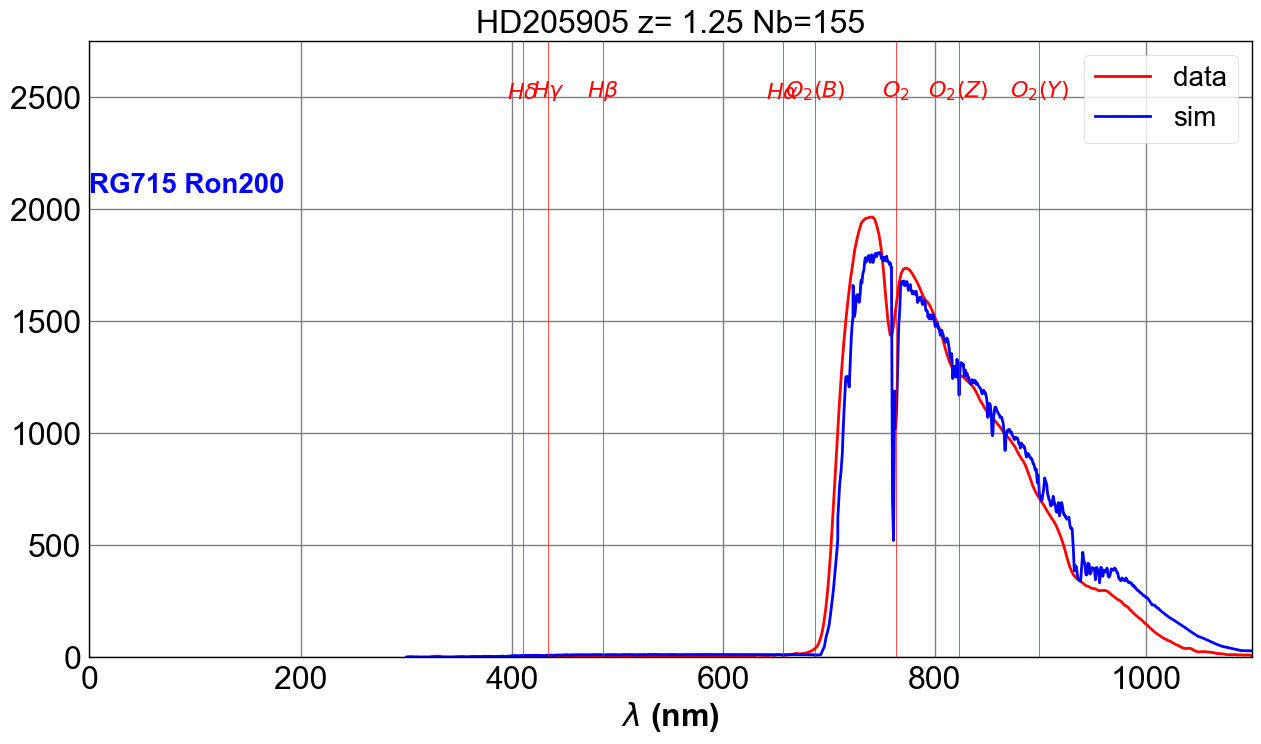

In [35]:
ShowOneSpectrum(0)

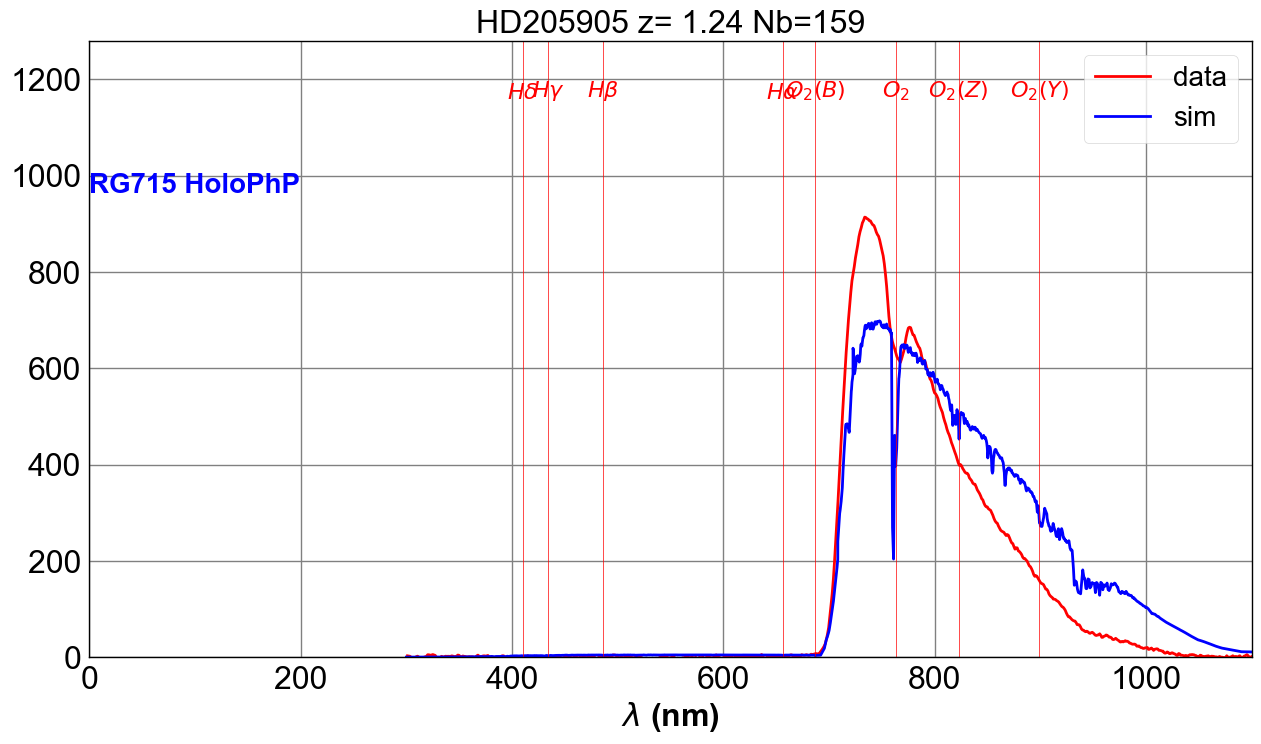

In [36]:
ShowOneSpectrum(1)

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


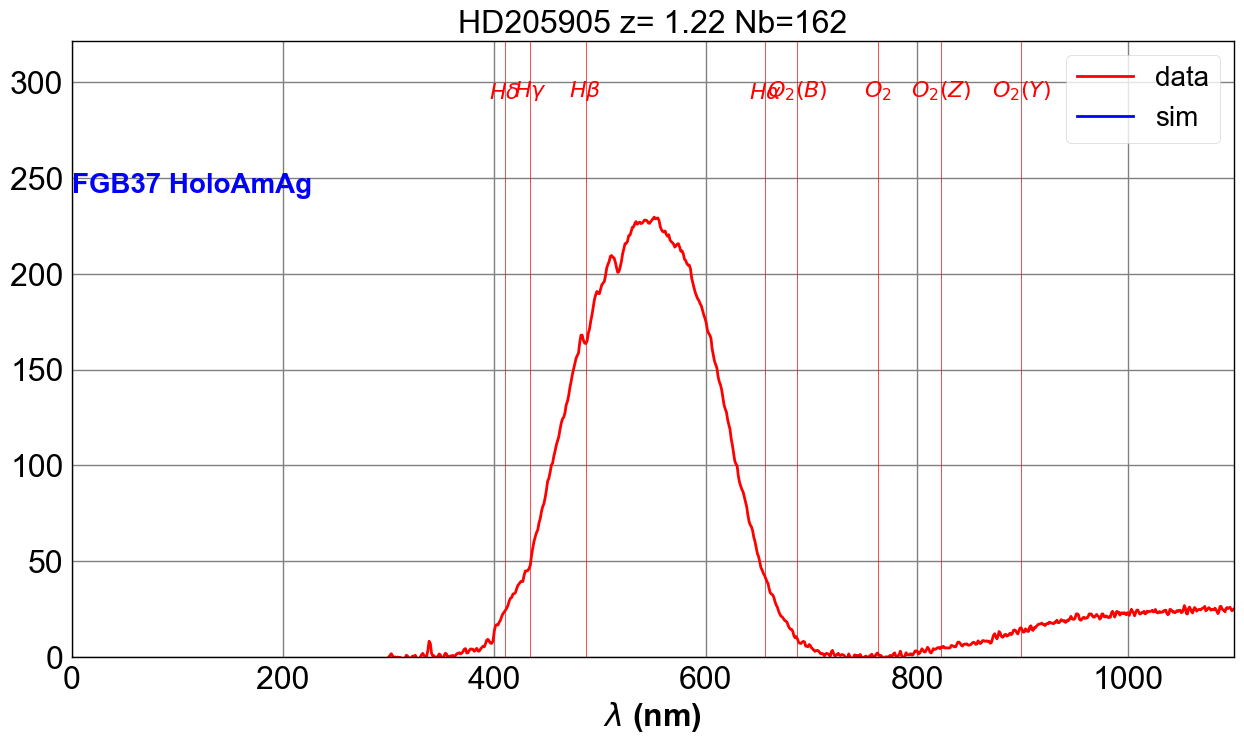

In [37]:
ShowOneSpectrum(4)

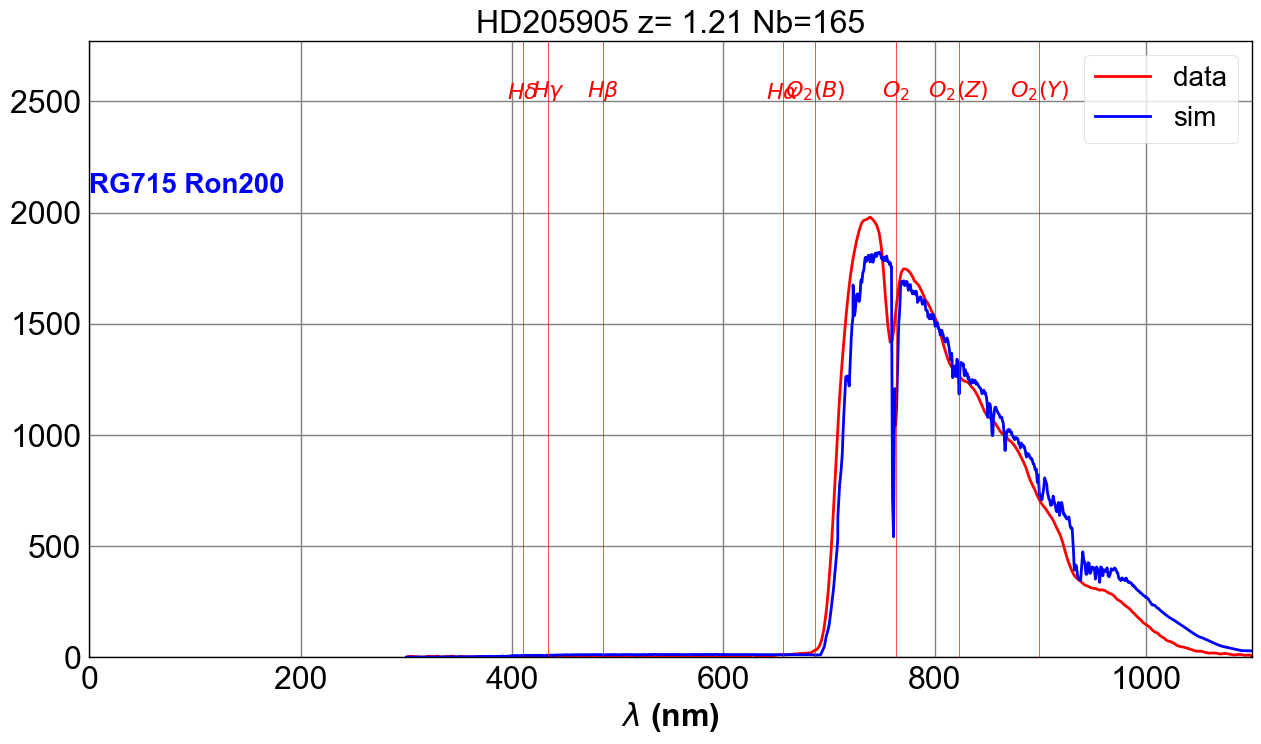

In [38]:
ShowOneSpectrum(5)

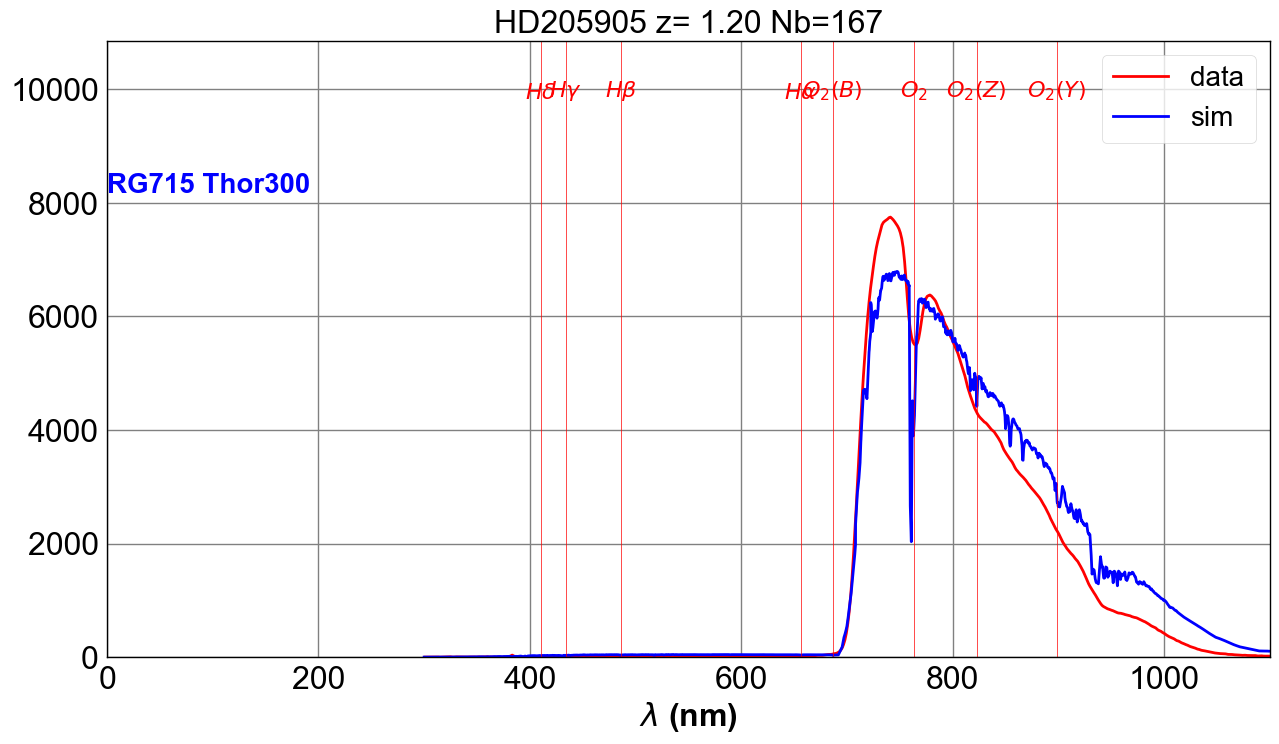

In [39]:
ShowOneSpectrum(6)

In [40]:
def ShowOneSpectrumNextFilt(sel):
    """
    ShowOneSpectrum
    ================
    """

    NBSPECTOPLOT=5
    
    the_spectra= []
    the_wl=[]
    the_max = []
    the_label= []
    
    for i in np.arange(NBSPECTOPLOT):

        the_spectrum=all_rightspectra_data[sel+i]
        thewl=all_rightspectra_wl[sel+i]
        theymin=the_spectrum.min()
        theymax=the_spectrum.max()
        thelabel=all_filt[sel+i]
        
        the_spectra.append(the_spectrum)
        the_wl.append(thewl)
        the_max.append(theymax)
        the_label.append(thelabel)

        
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    for i in np.arange(NBSPECTOPLOT):        
        ax.plot(the_wl[i],the_spectra[i],lw=3,label=the_label[i])

 
        
    max_y_to_plot=(np.array(the_max)).max()
    ymin=0
    ymax=max_y_to_plot
    ax.set_ylim(0.,max_y_to_plot*1.2)
    
    ax.set_title(all_titles[sel])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='grey', linewidth=1.0)
    #ax.grid(b=True, which='minor', color='grey', linewidth=0.5)

    YMIN=0.
    YMAX=max_y_to_plot*1.1
    
    for line in LINES:
        if line == O2 or line == HALPHA or line == HBETA or line == HGAMMA or line == HDELTA or line == O2B or line == O2Y or line == O2Z:
            ax.plot([line['lambda'],line['lambda']],[YMIN,YMAX],'-',color='red',lw=0.5)
            ax.text(line['lambda'],0.9*(YMAX-YMIN),line['label'],verticalalignment='bottom', horizontalalignment='center',color='red', fontweight='bold',fontsize=16)
    
    ax.legend(loc='best',fontsize=20)
    ax.set_xlim(0,1100)
    ax.set_xlabel("$\lambda$ (nm)")
    ax.set_ylabel("ADU")
    
    
    figname='five_intput_calibrated_spectra_{}.pdf'.format(sel)
    figfilename=os.path.join(dir_top_images,figname)
    fig.savefig(figfilename)

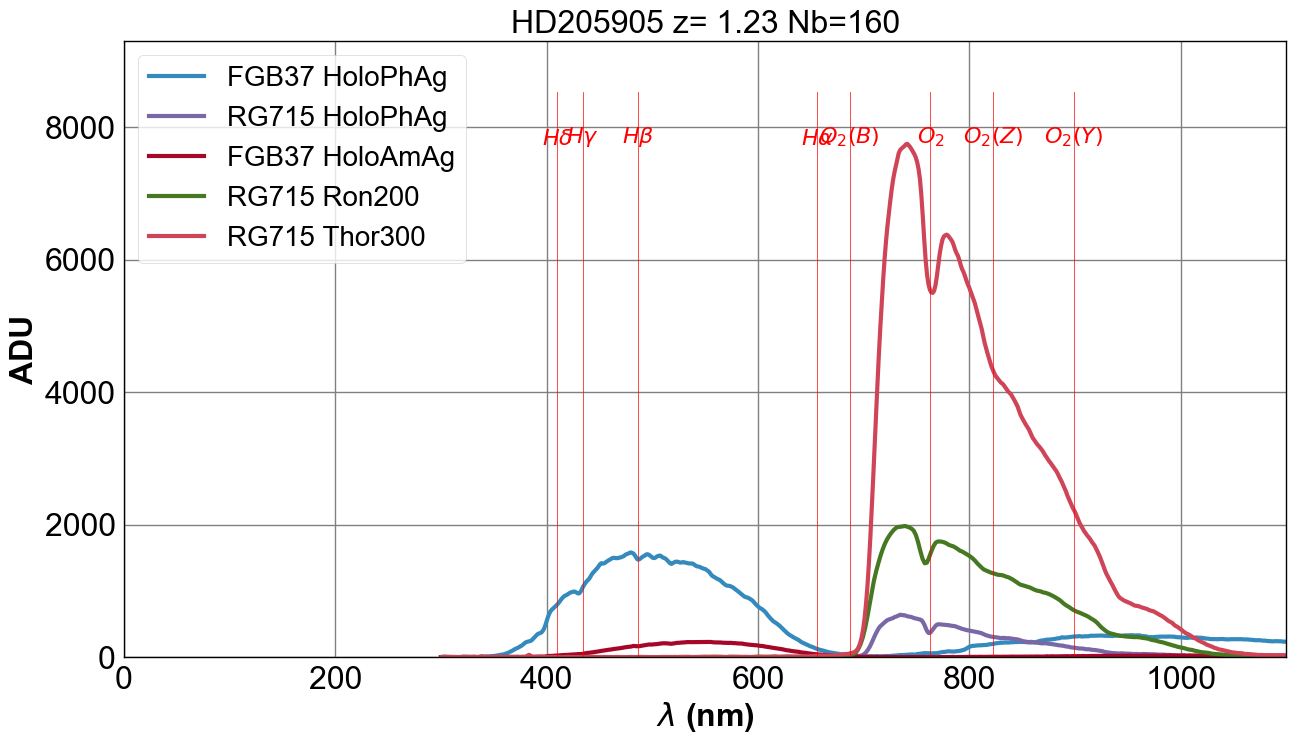

In [41]:
ShowOneSpectrumNextFilt(2)